In [1]:
import pandas as pd
import pandas.io.data as web
import numpy as np
import datetime
import matplotlib.pyplot as plt
%matplotlib inline
pd.set_option('display.notebook_repr_html', False)
pd.set_option('display.max_columns', 6)
pd.set_option('display.max_rows', 10)
pd.set_option('display.width', 78)
pd.set_option('precision', 3)

In [2]:
khsw = web.DataReader('002022.SZ', 'yahoo', '2010/1', '2015/11/10')

In [138]:
def tr(data, name):
    data[name] = data.shift(1).Close
    hh = data[['High', name]].max(axis=1)
    ll = data[['Low', name]].min(axis=1)
    return(hh -ll)

tr(khsw, 'prevClose')

khsw['TR'] = tr(khsw, 'prevClose')

In [4]:
khsw['long_ma']=pd.rolling_mean(khsw['Adj Close'], 120)

In [140]:
khsw['ATR'] = pd.rolling_mean(khsw['TR'], 30)
khsw.tail()

             Open   High    Low  ...   prevClose    TR   ATR
Date                             ...                        
2015-11-04  26.00  27.20  25.70  ...       25.10  2.10  1.21
2015-11-05  27.23  27.52  26.50  ...       27.15  1.02  1.21
2015-11-06  27.20  28.97  27.20  ...       27.36  1.77  1.19
2015-11-09  28.50  30.66  28.26  ...       28.69  2.40  1.27
2015-11-10  29.27  30.26  28.62  ...       29.21  1.64  1.29

[5 rows x 12 columns]

In [141]:
khsw['short_ma'] = pd.rolling_mean(khsw['Adj Close'], 30)
khsw['short_ma'].tail()
khsw['change'] = khsw['Adj Close'].pct_change()

In [142]:
vkhsw = khsw[120:].copy()
vkhsw.head


<bound method DataFrame.head of              Open   High    Low  ...   prevClose    TR   ATR
Date                             ...                        
2010-07-07  14.57  14.59  14.05  ...       14.53  0.54  0.86
2010-07-08  14.30  14.95  14.08  ...       14.45  0.87  0.86
2010-07-09  14.40  14.88  14.21  ...       14.50  0.67  0.86
2010-07-12  14.59  14.95  14.59  ...       14.71  0.36  0.85
2010-07-13  14.77  14.77  14.00  ...       14.78  0.78  0.74
...           ...    ...    ...  ...         ...   ...   ...
2015-11-04  26.00  27.20  25.70  ...       25.10  2.10  1.21
2015-11-05  27.23  27.52  26.50  ...       27.15  1.02  1.21
2015-11-06  27.20  28.97  27.20  ...       27.36  1.77  1.19
2015-11-09  28.50  30.66  28.26  ...       28.69  2.40  1.27
2015-11-10  29.27  30.26  28.62  ...       29.21  1.64  1.29

[1367 rows x 12 columns]>

In [143]:
vkhsw['sig']=0

In [144]:
vkhsw.loc[vkhsw.short_ma > vkhsw.long_ma, 'sig']= 1

In [145]:
vkhsw.loc[vkhsw.sig==1]

             Open   High    Low ...     TR   ATR  sig
Date                            ...                  
2010-10-29  17.23  17.40  16.72 ...   0.68  0.69    1
2010-11-01  17.48  17.77  17.30 ...   0.47  0.69    1
2010-11-02  17.60  17.77  17.21 ...   0.56  0.68    1
2010-11-03  17.21  17.32  16.80 ...   0.52  0.67    1
2010-11-04  16.93  17.50  16.91 ...   0.59  0.66    1
...           ...    ...    ... ...    ...   ...  ...
2015-07-23  37.00  38.47  36.57 ...   1.90  3.59    1
2015-07-24  38.19  40.99  37.56 ...   3.43  3.49    1
2015-07-27  38.00  39.24  34.92 ...   4.32  3.47    1
2015-07-28  32.93  34.00  31.43 ...   3.49  3.42    1
2015-07-29  32.69  33.48  29.11 ...   4.37  3.40    1

[702 rows x 13 columns]

In [146]:
vkhsw['ret'] = (vkhsw.sig*vkhsw.change + 1).cumprod()
vkhsw['norm_ret'] = (vkhsw.change +1).cumprod()

# and ax2 is in the lower row



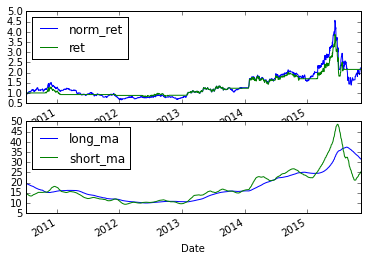

In [147]:
ax1 = plt.subplot2grid(shape=(2,1), loc=(0,0))
ax2 = plt.subplot2grid(shape=(2,1), loc=(1,0))

vkhsw[['norm_ret', 'ret']].plot(ax = ax1)
vkhsw[[ 'long_ma', 'short_ma']].plot(ax = ax2)

In [148]:
trans_count = vkhsw[vkhsw.sig > vkhsw.shift().sig]

In [149]:
len(trans_count)

7

In [150]:
vkhsw['20111206': '20111208']

             Open   High    Low    ...     sig   ret  norm_ret
Date                               ...                        
2011-12-06  12.30  12.45  12.16    ...       0  0.92      0.87
2011-12-07  12.42  12.75  12.35    ...       1  0.94      0.89
2011-12-08  12.51  12.66  12.16    ...       1  0.92      0.87

[3 rows x 15 columns]

In [151]:
exit_count = vkhsw[vkhsw.sig < vkhsw.shift().sig]
exit_count.count()

Open        7
High        7
Low         7
Close       7
Volume      7
           ..
TR          7
ATR         7
sig         7
ret         7
norm_ret    7
dtype: int64

In [152]:
trans_idx = (trans_count + exit_count).index

In [153]:
max_return = pd.Series([0.0]*len(trans_count))
max_drawdown = max_return.copy()
exit_return = max_drawdown.copy()
max_return

0    0
1    0
2    0
3    0
4    0
5    0
6    0
dtype: float64

In [154]:
for i in range(0, len(trans_idx)//2):
    idx = i *2
    trading_days = vkhsw[trans_idx[idx]:trans_idx[idx+1] ].copy()
    day_len = len(trading_days)
    trading_days.ret = (1+trading_days["Adj Close"].pct_change()).cumprod()
    trading_days.norm_ret = trading_days.ret /trading_days.ret.cummax()#use to calc rolling max
    max_return[i], max_drawdown[i], exit_return[i] = trade_summ(trading_days, trans_idx[idx+1])

In [155]:
trade_summary = pd.DataFrame([max_return, max_drawdown, exit_return])
trade_summary

      0     1     2  ...      4     5     6
0  1.27  0.98  1.14  ...   1.49  1.23  2.28
1  0.29  0.07  0.16  ...   0.23  0.20  0.53
2  0.91  0.91  1.02  ...   1.31  1.05  1.17

[3 rows x 7 columns]

In [29]:
last_return = exit_return.cumprod()

In [80]:

def trade_summ( data, at):
    max_ret = np.max(data.ret)
    max_dd = 1 - np.min(data.norm_ret)
    exit_ret = data.ret.loc[at]
    return (max_ret, max_dd, exit_ret)

In [122]:

stoploss = 0.95
for i in range(0, len(trans_idx)//2):
    idx = i *2
    trading_days = vkhsw[trans_idx[idx]:trans_idx[idx+1] ].copy()
    day_len = len(trading_days)
    trading_days.ret = (1+trading_days["Adj Close"].pct_change()).cumprod()
    trading_days.norm_ret = trading_days.ret /trading_days.ret.cummax()#use to calc rolling max
    
    # stop loss filter
    trading_days['stopex'] = 0 
    trading_days.loc[trading_days.ret < stoploss, 'stopex'] = 1
    stop_at = trading_days[trading_days.stopex == 1].index.min()
    print stop_at
    
    # trailing stop filter
    tr_stop = 3 * trading_days.loc[ trans_idx[idx], 'ATR']
    tr_sig = abs(trading_days.Close - trading_days.Close.cumsum()) > tr_stop 
    
    if  not stop_at.year > 0: stop_at = trans_idx[idx+1]
    stop_tds = trading_days[:stop_at].copy()            
    max_return[i], max_drawdown[i], exit_return[i] = trade_summ(stop_tds, stop_at)
    


2011-01-17 00:00:00
2011-12-13 00:00:00
2012-05-25 00:00:00
NaT
NaT
NaT
NaT


In [165]:
test = vkhsw['20111206': '20111220'].copy()
# test for trailing stop
test.loc[abs(test.Close - test.Close.cummax())>1, 'sig'] =1 

In [133]:
test['prevClose'] = test.shift(1).Close
test

             Open   High    Low    ...      norm_ret  stopex  prevClose
Date                               ...                                 
2011-12-06  12.30  12.45  12.16    ...          0.87       1        NaN
2011-12-07  12.42  12.75  12.35    ...          0.89       1      12.38
2011-12-08  12.51  12.66  12.16    ...          0.87       1      12.61

[3 rows x 14 columns]

In [135]:
test[['High', 'prevClose']].max(axis=1) - test[['Low', 'prevClose']].min(axis=1)

Date
2011-12-06    0.29
2011-12-07    0.40
2011-12-08    0.50
dtype: float64

In [166]:
test

             Open   High    Low    ...     sig   ret  norm_ret
Date                               ...                        
2011-12-06  12.30  12.45  12.16    ...       0  0.92      0.87
2011-12-07  12.42  12.75  12.35    ...       1  0.94      0.89
2011-12-08  12.51  12.66  12.16    ...       1  0.92      0.87
2011-12-09  12.18  12.42  12.16    ...       1  0.91      0.86
2011-12-12  12.23  12.39  12.20    ...       1  0.91      0.86
...           ...    ...    ...    ...     ...   ...       ...
2011-12-14  11.90  12.05  11.77    ...       1  0.88      0.83
2011-12-15  11.73  11.88  11.11    ...       1  0.88      0.81
2011-12-16  11.44  11.68  11.15    ...       0  0.88      0.82
2011-12-19  11.48  11.62  11.19    ...       1  0.88      0.81
2011-12-20  11.58  11.88  11.50    ...       0  0.88      0.82

[11 rows x 15 columns]